### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [1]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#1.删除重复数据，并输出去重前后的数据量
row1 = data.shape[0] 
data = data.drop_duplicates()
row2 = data.shape[0]

print(f'去重前的数据量: {row1}') 
print(f'去重后的数据量: {row2}')

去重前的数据量: 20358
去重后的数据量: 19779


In [3]:
#2.缺失值处理
missing_values = data.isnull().sum().sum()
print("缺失值数量：\n", missing_values)

boolean_columns = ['site_admin', 'company', 'blog', 'location', 
                   'email', 'hireable', 'bio', 'twitter_username']
for col in boolean_columns: 
    data[col] = data[col].notnull()

data.fillna('', inplace=True)
missing_values2 = data.isnull().sum().sum() 
print("处理后缺失值数量：", missing_values2)

缺失值数量：
 103702
处理后缺失值数量： 0


/tmp/ipykernel_1074/2835697591.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('', inplace=True)


In [4]:
#3.数据变换，将created_at、updated_at转为时间戳
data['created_at'] = pd.to_datetime(data['created_at']) 
data['updated_at'] = pd.to_datetime(data['updated_at']) # 输出前几行数据进行验证 


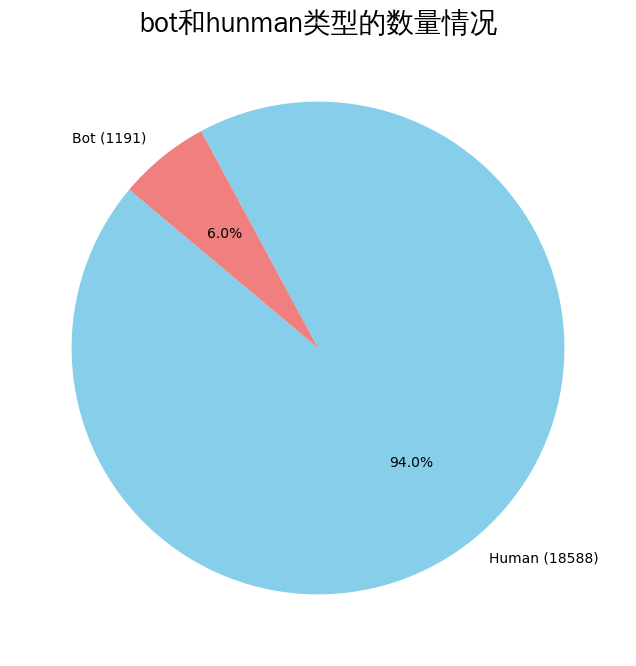

In [5]:
#4.1 可视化bot和hunman类型的情况
import matplotlib.pyplot as plt

from matplotlib import font_manager
font_path = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'  
my_font = font_manager.FontProperties(fname=font_path)

type_counts = data['label'].value_counts()
plt.figure(figsize=(8, 8)) 
wedges, texts, autotexts = plt.pie(type_counts, labels=type_counts.index, 
                                   autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], 
                                   startangle=140)
plt.title('bot和hunman类型的数量情况', fontproperties=my_font, fontsize=20) 
for i, txt in enumerate(texts): 
    txt.set_text(f'{type_counts.index[i]} ({type_counts.values[i]})')
plt.show()

要展现两类用户的数量对比，使用饼图最为直观。从图上来看数据集中Human用户的数量远多于bot的数量。

/tmp/ipykernel_1074/1596013291.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bot_created_monthly = bot_data['created_at'].dt.to_period('M').value_counts().sort_index()


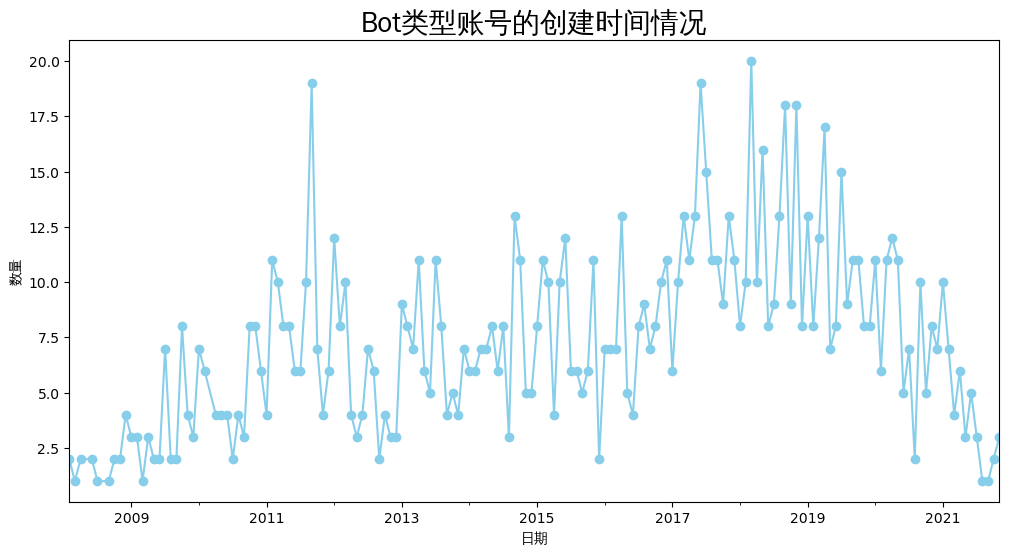

In [6]:
#4.2 可视化bot类型账号的created_at情况
bot_data = data[data['label'] == 'Bot']   
bot_created_monthly = bot_data['created_at'].dt.to_period('M').value_counts().sort_index() 

plt.figure(figsize=(12, 6)) 
bot_created_monthly.plot(kind='line', marker='o', linestyle='-', color='skyblue') 
plt.title('Bot类型账号的创建时间情况', fontsize=20, fontproperties=my_font) 
plt.xlabel('日期', fontproperties=my_font) 
plt.ylabel('数量', fontproperties=my_font) 
plt.show()


使用折线图可以直观地反映bot类型账号各时间点（月份）创建的数量和按照时间创建的趋势。

/tmp/ipykernel_1074/2285706364.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  human_created_monthly = human_data['created_at'].dt.to_period('M').value_counts().sort_index()


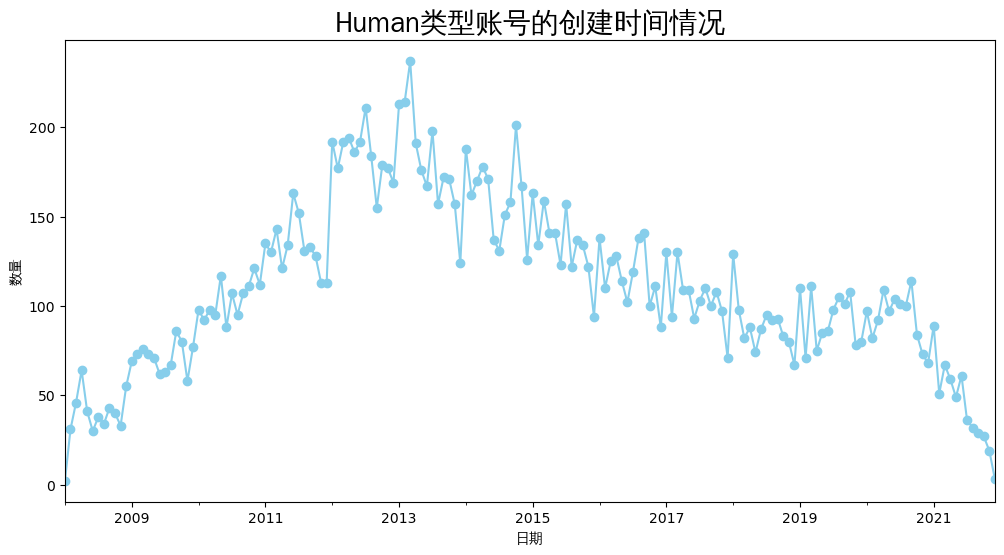

In [7]:
#4.3 可视化human类型账号的created_at情况
human_data = data[data['label'] == 'Human']   
human_created_monthly = human_data['created_at'].dt.to_period('M').value_counts().sort_index() 

plt.figure(figsize=(12, 6)) 
human_created_monthly.plot(kind='line', marker='o', linestyle='-', color='skyblue') 
plt.title('Human类型账号的创建时间情况', fontsize=20, fontproperties=my_font) 
plt.xlabel('日期', fontproperties=my_font) 
plt.ylabel('数量', fontproperties=my_font) 
plt.show()

使用折线图可以直观地反映bot类型账号各时间点（月份）创建的数量和按照时间创建的趋势。

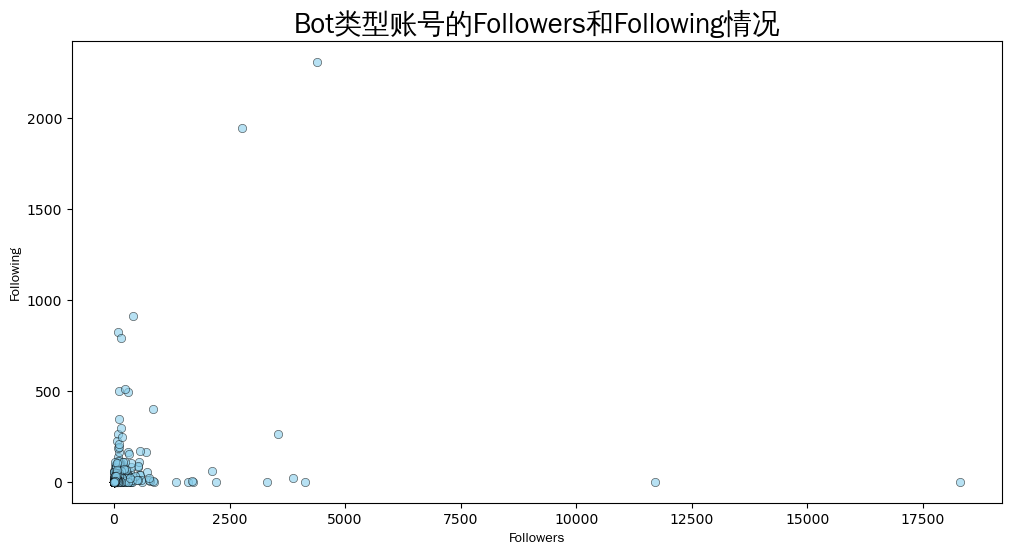

In [8]:
#4.4 可视化bot类型账号的followers和following情况

plt.figure(figsize=(12, 6)) 
plt.scatter(bot_data['followers'], bot_data['following'], color='skyblue', alpha=0.6,edgecolor='k', linewidth=0.5) 
plt.title('Bot类型账号的Followers和Following情况', fontsize=20, fontproperties=my_font) 
plt.xlabel('Followers', fontproperties=my_font) 
plt.ylabel('Following', fontproperties=my_font)
plt.show()

散点图可以直观地展示一个账号follower和following的关系，并出展现分布情况和某种趋势。
从图上看，bot类型账号的followers和following数量都不多，关注度都不高，只有极个别有较多的关注数量和粉丝。两者之间也没有明显的线性关联。

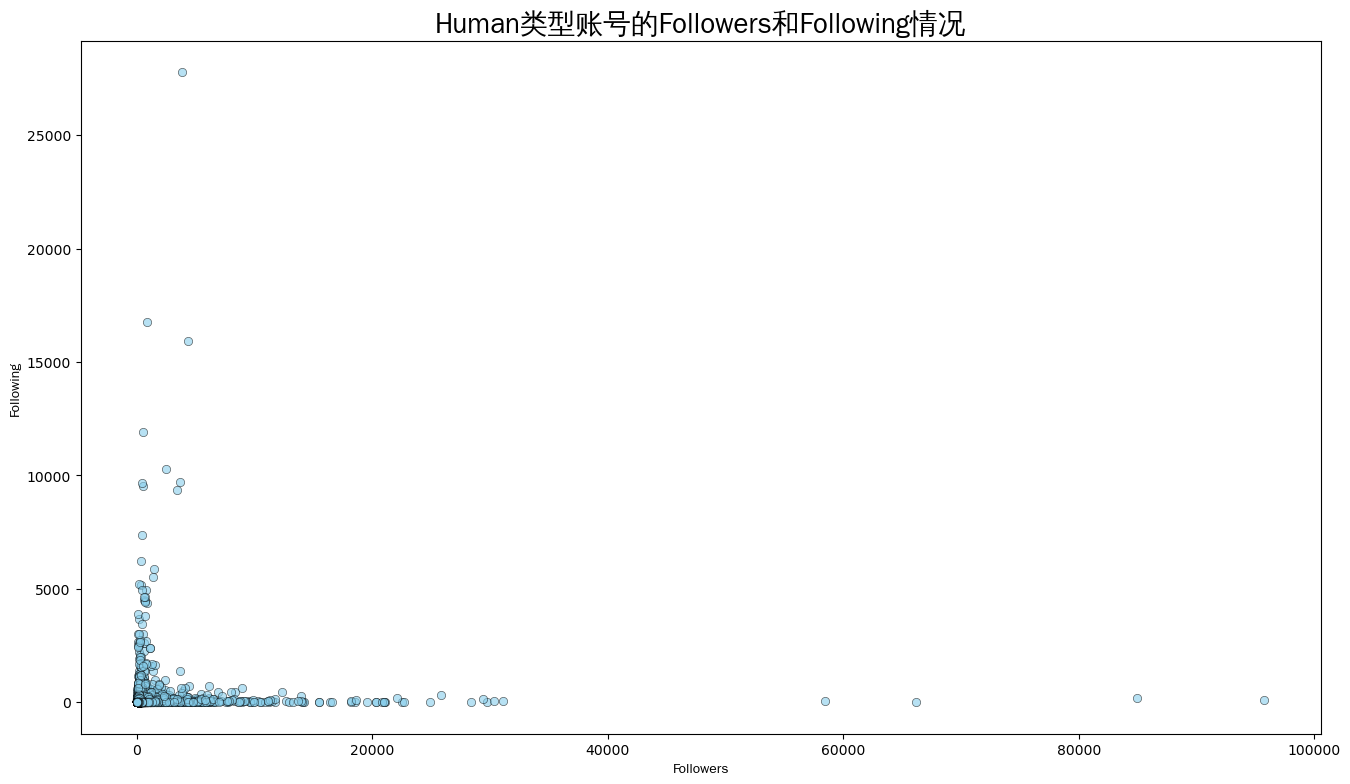

In [9]:
#4.5 可视化human类型账号的followers和following情况
plt.figure(figsize=(16, 9)) 
plt.scatter(human_data['followers'], human_data['following'], color='skyblue', alpha=0.6,edgecolor='k', linewidth=0.5) 
plt.title('Human类型账号的Followers和Following情况', fontsize=20, fontproperties=my_font) 
plt.xlabel('Followers', fontproperties=my_font) 
plt.ylabel('Following', fontproperties=my_font)
plt.show()

散点图可以直观地展示一个账号follower和following的关系，并出展现分布情况和某种趋势。
human账号的follower和following都比较多，但是呈现一种两者只取其一的感觉，要么关注账号多，要么粉丝多，成一个L形状，说明二者关联性不强。
